# Introduction to Deep Learning


<img src="http://devhumor.com/content/uploads/images/February2017/tumblr_olg1aoeQHX1rgfni8o1_1280.jpg" alt="Drawing" style="width: 250px; height: 400px"/>


In [ ]:
!pip install scipy==1.1.0

Now restart runtime.

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
print(torch.__version__)

from torch import nn
import torch.nn.functional as F

1.1.0


## Задание 1.

In [4]:
import os
import numpy as np
from scipy.misc import imread,imresize
from sklearn.model_selection import train_test_split
from glob import glob

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):

    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0

    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: continue
        try:
            data.append(imresize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)

    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))

    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')

    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)

    print("Done")
    return X_train, y_train, X_test, y_test



In [5]:
# from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...


/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


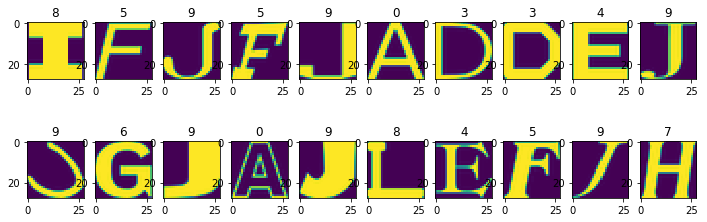

In [12]:
%matplotlib inline
plt.figure(figsize=[12,4])
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [24]:
model = nn.Sequential()

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
history = []

for i in range(200):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.int64)

    # predict probabilities
    y_predicted =  model(x_batch)
    assert y_predicted.dim(
    ) == 2, "did you forget something?"

    # compute loss, just like before
    loss =  F.nll_loss(F.log_softmax(y_predicted), y_batch)

    # compute gradients
    < YOUR CODE >
    
    # Adam step
    < YOUR CODE >

    # clear gradients
    < YOUR CODE >

    history.append(loss.data.numpy())

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


step #0 | mean loss = 2.326
step #10 | mean loss = 1.596
step #20 | mean loss = 0.833
step #30 | mean loss = 0.629
step #40 | mean loss = 0.538
step #50 | mean loss = 0.477
step #60 | mean loss = 0.526
step #70 | mean loss = 0.495
step #80 | mean loss = 0.437
step #90 | mean loss = 0.405
step #100 | mean loss = 0.414
step #110 | mean loss = 0.388
step #120 | mean loss = 0.431
step #130 | mean loss = 0.381
step #140 | mean loss = 0.401
step #150 | mean loss = 0.387
step #160 | mean loss = 0.374
step #170 | mean loss = 0.384
step #180 | mean loss = 0.414
step #190 | mean loss = 0.357


In [27]:
# use your model to predict classes (0 or 1) for all test samples
predicted_y_test =  np.argmax(model(torch.tensor(X_test, dtype=torch.float32)).data.numpy(), axis=-1)

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(
    predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.9, "try training longer"

Test accuracy: 0.88314


AssertionError: try training longer